In [1]:
import pandas as pd
import numpy as np

features_40x = pd.read_csv("logistic_regression_40x_features.csv", index_col=0)
X = features_40x.iloc[:, :512]
labels = features_40x.iloc[:, 512]

In [6]:
from sklearn.cluster import AffinityPropagation
import seaborn as sns
from sklearn.manifold import TSNE
import time 

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1955 samples in 0.000s...
[t-SNE] Computed neighbors for 1955 samples in 0.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1955
[t-SNE] Computed conditional probabilities for sample 1955 / 1955
[t-SNE] Mean sigma: 2.454110
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.833710
[t-SNE] KL divergence after 300 iterations: 1.576866
t-SNE done! Time elapsed: 4.620553970336914 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

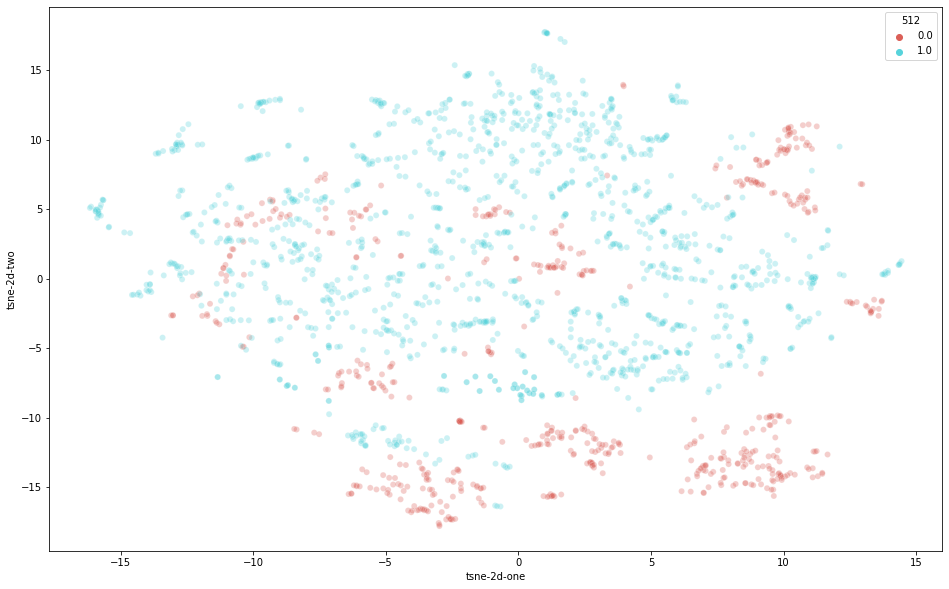

In [15]:
import matplotlib.pyplot as plt

X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue =labels , 
    data=X,
    legend="full",
    alpha=0.3
)

In [16]:
from sklearn.decomposition import PCA

X = features_40x.iloc[:, :512]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X.values)
X['pca-one'] = pca_result[:,0]
X['pca-two'] = pca_result[:,1] 
X['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.14785232 0.10454665 0.07363214]


In [23]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(X.shape[0])

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

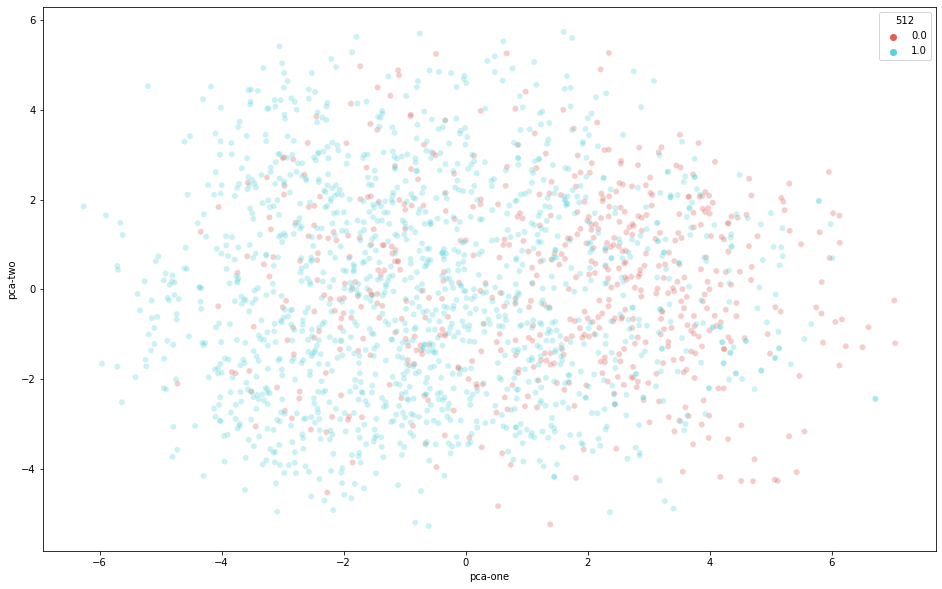

In [27]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=labels,
    palette=sns.color_palette("hls", 2),
    data=X,
    legend="full",
    alpha=0.3
)

C:\Users\grace\AppData\Local\Temp\ipykernel_32060\1511013013.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


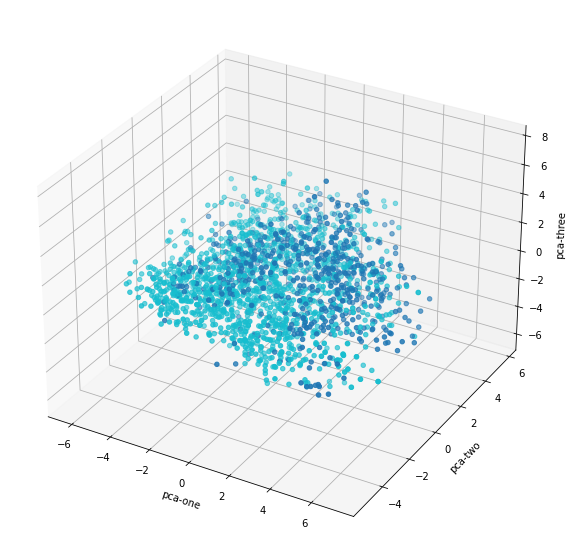

In [31]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X["pca-one"], 
    ys=X["pca-two"], 
    zs=X["pca-three"], 
    c=labels, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()